In [1]:
library(tidyverse)
library(glue)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────

In [2]:
color_dict = c("genot"= "#317d01",
    "CellFlow"= "#59d1d6",
    "chemCPA"= "#e6b1fc",
    "Biolord"= "#008000",
    "Baseline"="#8f97a8",
    "CondOT"="#e63946")

In [3]:
split_to_filter <- 5
dosage_to_filter <- "10000\\.0$"
dosage_to_filter_str <- sub("\\\\.*", "", dosage_to_filter)

In [4]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/plots_{split_to_filter}_{dosage_to_filter_str}")

In [5]:
output_dir

/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/plots_5_10000

# Decoded

In [6]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_decoded.csv") 
results_decoded <- results_decoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)



New names:
• `` -> `...1`
Rows: 8832 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


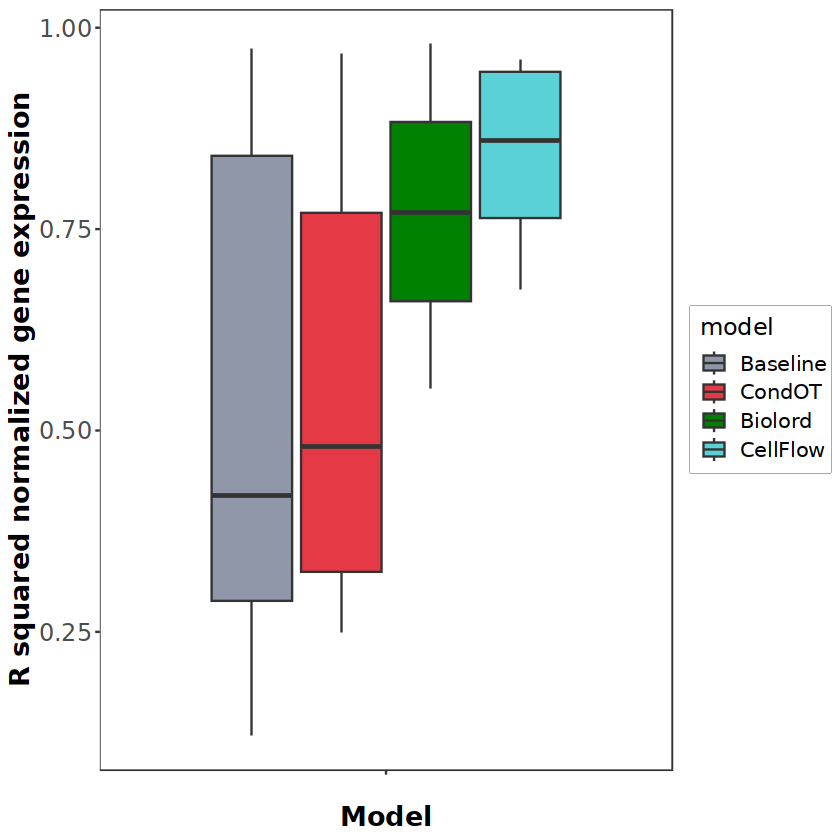

In [7]:
results_decoded$model <- factor(results_decoded$model, 
                            levels = c("id", "condot", "biolord", "otfm"),
                            labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results_decoded, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y=glue("R squared normalized gene expression")) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [8]:
ggsave(file.path(output_dir, "ood_r_squared_decoded.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


# Encoded

In [9]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_encoded.csv") 
results_encoded <- results_encoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 35328 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


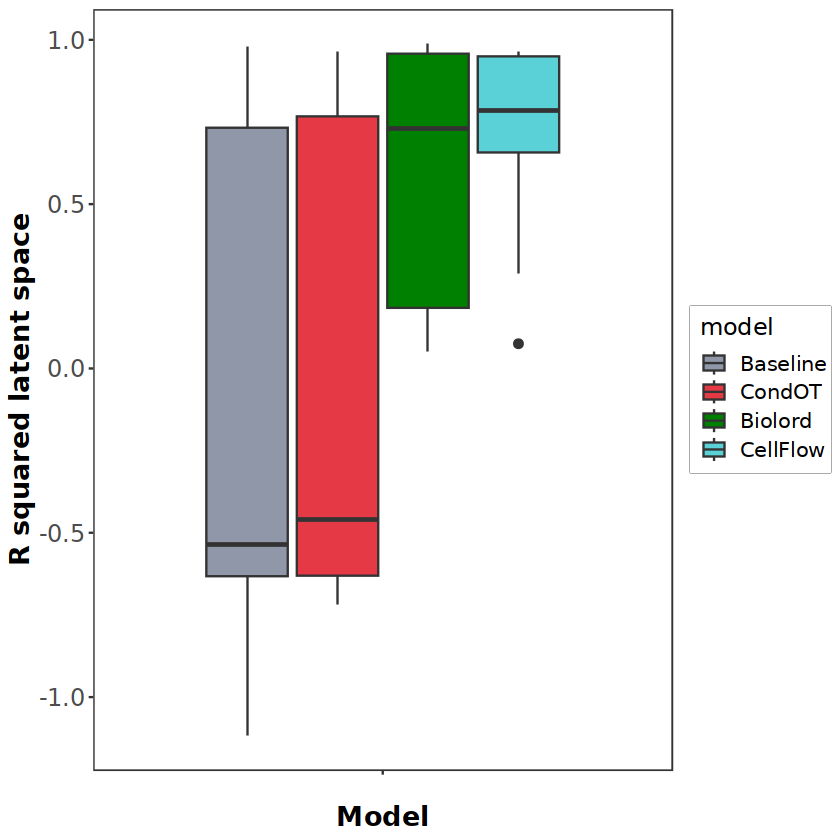

In [10]:
results <- results_encoded %>% filter(metric == "r_squared")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "biolord", "otfm"),
                            labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

p

In [11]:
ggsave(file.path(output_dir, "ood_r_squared_encoded.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


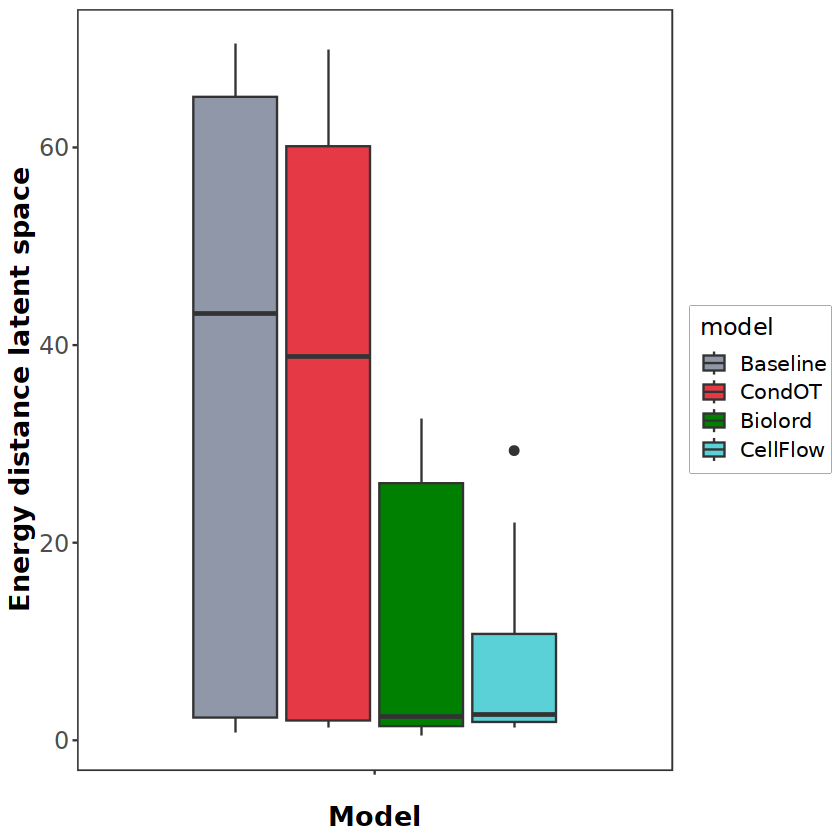

In [12]:
results <- results_encoded %>% filter(metric == "e_distance")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "biolord", "otfm"),
                                labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [13]:
ggsave(file.path(output_dir, "ood_e_distance_encoded.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


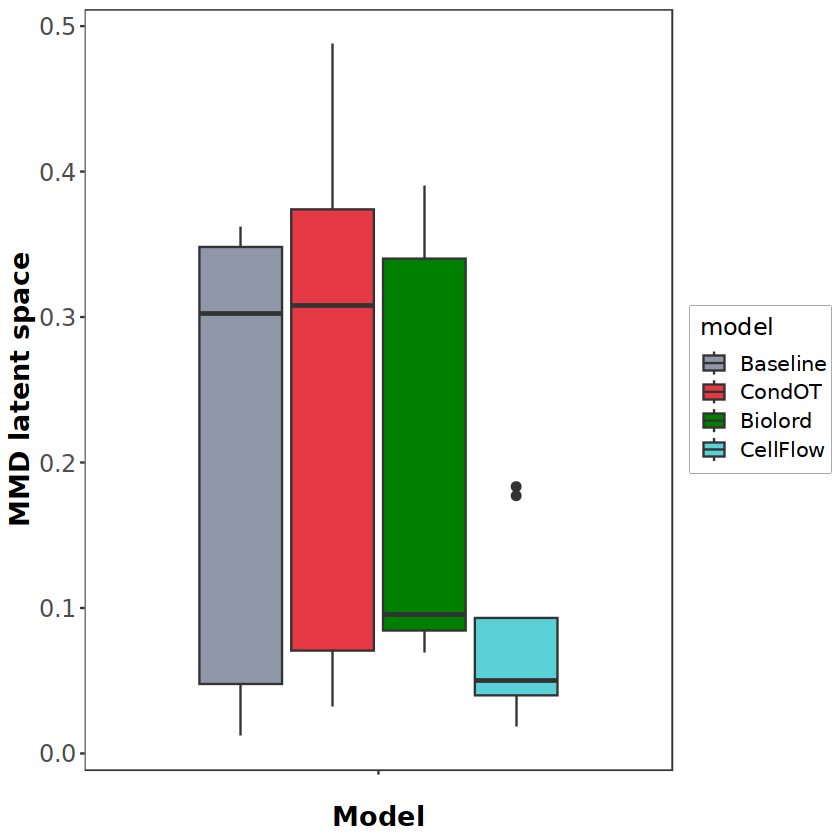

In [14]:
results <- results_encoded %>% filter(metric == "mmd")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "biolord", "otfm"),
                                labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD latent space") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [15]:
ggsave(file.path(output_dir, "ood_mmd_distance_encoded.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


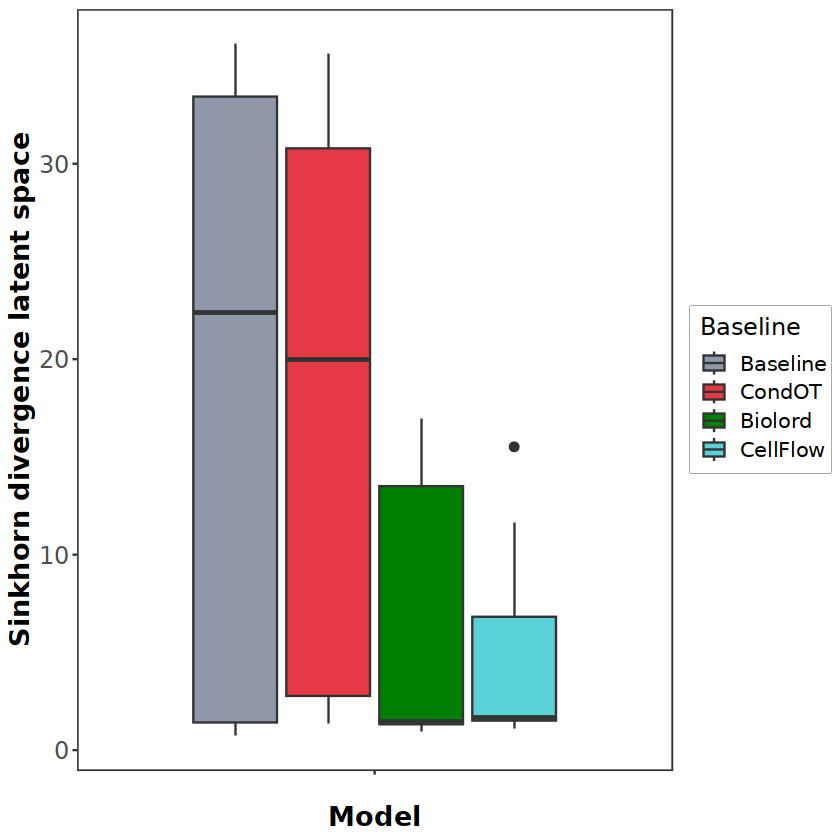

In [16]:
results <- results_encoded %>% filter(metric == "sinkhorn_div")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "biolord", "otfm"),
                                labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence latent space") +
  scale_fill_manual(values=color_dict, c("Baseline", "CondOT", "Biolord", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [17]:
ggsave(file.path(output_dir, "ood_sink_div_encoded.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


# DEG

In [18]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_deg.csv") 
results_deg <- results_deg %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 35328 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [148]:
results

...1,model,metric,variable,value,split
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>
179,Baseline,sinkhorn_div,A549_Flavopiridol_HCl_10000.0,0.75105842,5
183,Biolord,sinkhorn_div,A549_Flavopiridol_HCl_10000.0,1.41022158,5
187,CellFlow,sinkhorn_div,A549_Flavopiridol_HCl_10000.0,35.86059062,5
191,CondOT,sinkhorn_div,A549_Flavopiridol_HCl_10000.0,1.44879317,5
243,Baseline,sinkhorn_div,A549_Givinostat_(ITF2357)_10000.0,33.92424901,5
247,Biolord,sinkhorn_div,A549_Givinostat_(ITF2357)_10000.0,5.83436918,5
251,CellFlow,sinkhorn_div,A549_Givinostat_(ITF2357)_10000.0,17.57458433,5
255,CondOT,sinkhorn_div,A549_Givinostat_(ITF2357)_10000.0,9.80893707,5
691,Baseline,sinkhorn_div,K562_Hesperadin_10000.0,1.41701937,5


In [146]:
results <- results_deg %>% filter(metric == "r_squared")


results$model <- factor(results$model, 
                                levels = c("id", "condot", "biolord", "otfm"),
                                labels = c("Baseline", "CondOT", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared DEG") +
    scale_fill_manual(values=color_dict, c("Baseline", "CondOT", "Biolord", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

In [19]:
ggsave(file.path(output_dir, "ood_r_squared_deg.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


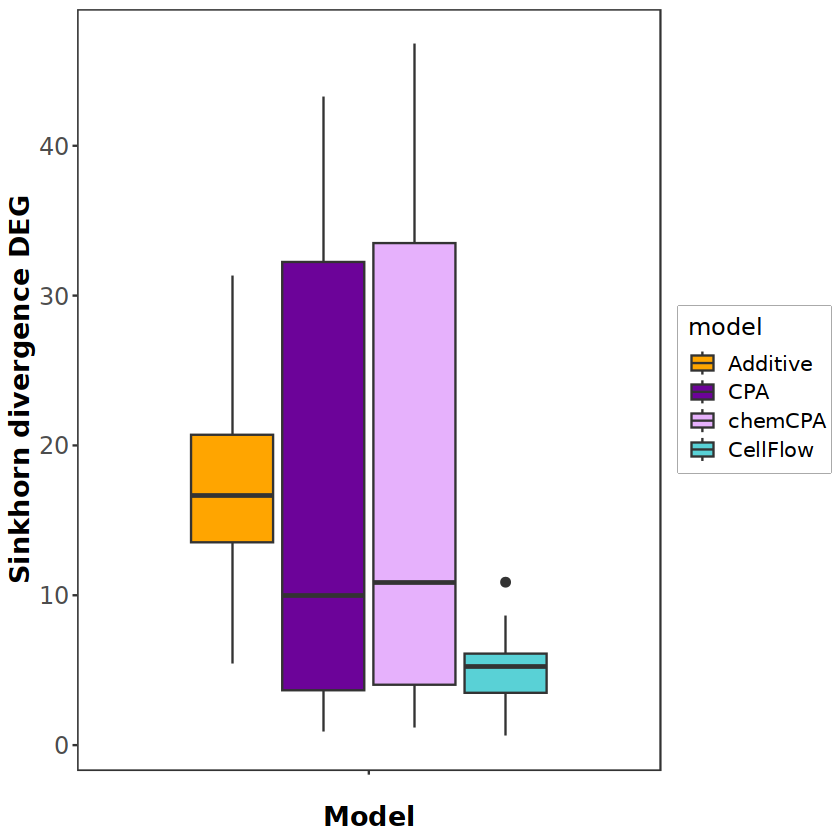

In [20]:
results <- results_deg %>% filter(metric == "sinkhorn_div")


results$model <- factor(results$model, 
                                levels = c("add", "CPA", "chemCPA", "otfm"),
                                labels = c("Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence DEG") +
    scale_fill_manual(values=color_dict, labels=c("Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [21]:
ggsave(file.path(output_dir, "ood_sink_div_deg.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


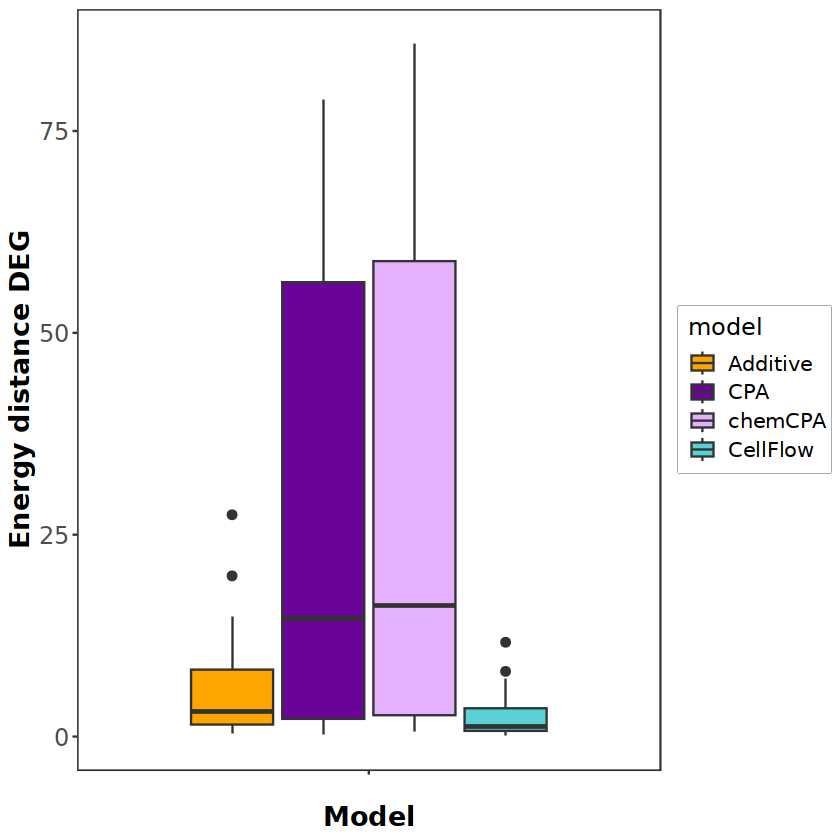

In [22]:
results <- results_deg %>% filter(metric == "e_distance")


results$model <- factor(results$model, 
                                levels = c("add", "CPA", "chemCPA", "otfm"),
                                labels = c("Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance DEG") +
    scale_fill_manual(values=color_dict, labels=c("Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [23]:
ggsave(file.path(output_dir, "ood_e_distance_deg.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image


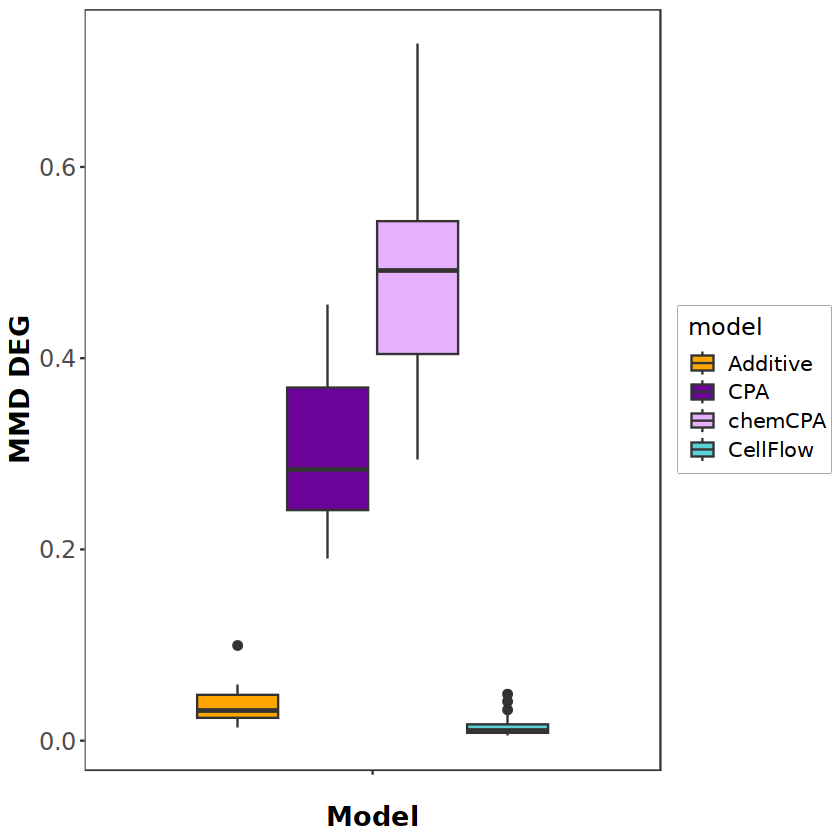

In [24]:
results <- results_deg %>% filter(metric == "mmd")


results$model <- factor(results$model, 
                                levels = c("add", "CPA", "chemCPA", "otfm"),
                                labels = c("Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

p <- ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD DEG") +
    scale_fill_manual(values=color_dict, labels=c("Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [25]:
ggsave(file.path(output_dir, "ood_mmd_deg.pdf"), plot = p, device = "pdf")

Saving 6.67 x 6.67 in image
